# Karate club

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Needed functions

In [3]:
# Club initialization function

def initialize_club(weight, state_off, state_hi, state_other):
    g = nx.karate_club_graph()

    # add state attribute to nodes
    for i, j in g.nodes(data = True):

        if j['club'] == 'Mr. Hi':
            g.add_node(i, state=state_hi)

        elif j['club'] == 'Officer':
            g.add_node(i, state=state_off)

        else:
            g.add_node(i, state=state_other)
            
    # add weight attribute to edges
    for i, j, k in g.edges(data = True):
        g.add_edge(i, j, weight=weight)
    
    nextg = g.copy()

    return g, nextg

0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.39453125
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.39453125
0.50390625
0.50390625
0.50390625
0.39453125
0.50390625
0.39453125
0.39453125
0.39453125
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.39453125
0.39453125
0.39453125
0.50390625
0.39453125
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.39453125
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625


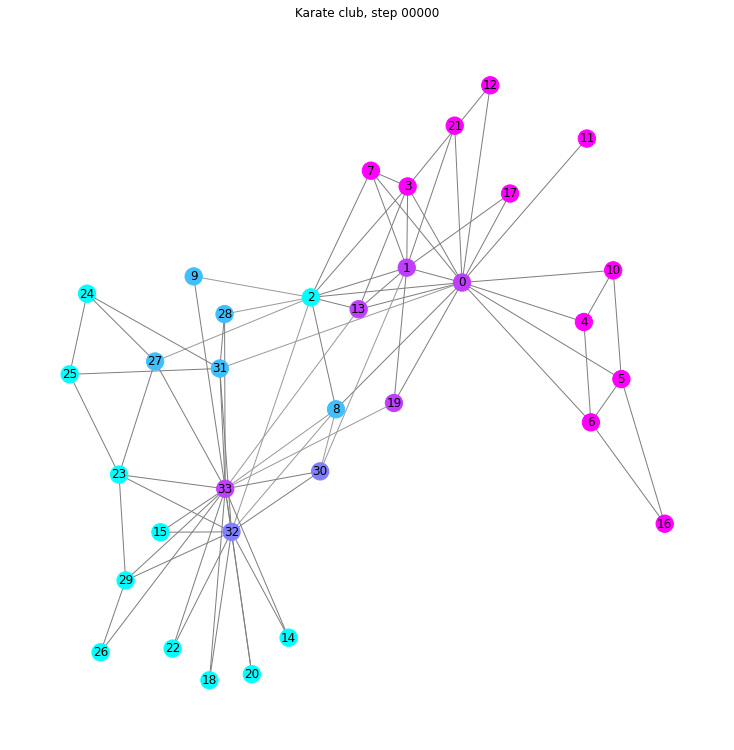

0.5078122615814209
0.4726581573486328
0.50390625
0.50390625
0.50390625
0.50390625
0.50390625
0.5000002384185791
0.50390625
0.50390625
0.50390625
0.5078122615814209
0.50390625
0.5078122615814209
0.50390625
0.39079880714416504
0.4726581573486328
0.50390625
0.50390625
0.5078122615814209
0.50390625
0.5078122615814209
0.50390625
0.39453125
0.39844393730163574
0.39844393730163574
0.50390625
0.39453125
0.4726581573486328
0.39453125
0.39453125
0.39079880714416504
0.5078122615814209
0.5078122615814209
0.50390625
0.5078122615814209
0.5078122615814209
0.5078122615814209
0.5078122615814209
0.5078122615814209
0.5078122615814209
0.39453125
0.39453125
0.39079880714416504
0.5000002384185791
0.39826369285583496
0.5000002384185791
0.4726581573486328
0.5000002384185791
0.4726581573486328
0.5000002384185791
0.4726581573486328
0.39826369285583496
0.5000002384185791
0.4726581573486328
0.5000002384185791
0.4726581573486328
0.5078122615814209
0.50390625
0.5078122615814209
0.5000002384185791
0.4726581573486328

OverflowError: (34, 'Result too large')

In [6]:
# initial parameters

D = 5
beta = 10
dt = 0.01
c_hi = 1    # state Mr Hi
c_off = 0   # state Officer
c_other = 0.5   # state other
w_init = 0.5    # initial weight

time_steps = 100 # number of time steps
frames = time_steps / 10 # number of frames

dt = 0.1

# club initialization
club = initialize_club(w_init, c_off, c_hi, c_other)

g = club[0]     # our graph
nextg = club[1] # copy of our graph

# update club
for t in range(time_steps):

    for i in g.nodes():     # nodes loop
        c_i = g.nodes[i]['state']
        n_states_sum = 0
        
        # sum of weights of neighbors
        for j in g.neighbors(i):
            n_states_sum += (g.nodes[j]['state'] - c_i) * g.edges[i, j]['weight'] # here was a mistake

        nextg.nodes[i]['state'] = c_i + D * n_states_sum * dt

    for i, j in g.edges():     # edges loop
        w_ij = g.edges[i, j]['weight']
        nextg.edges[i, j]['weight'] = w_ij - (w_ij * beta * (1 - w_ij) * (abs(g.nodes[i]['state'] - g.nodes[j]['state']) - 0.25) ** 3) * dt 
        
    g, nextg = nextg, g
    for i, j in g.edges(): # edges loop

        print(g.edges[i, j]['weight'])

    # draw our graph
    if t % 10 == 0:

        plt.rcParams["figure.figsize"] = (10, 10)
        plt.clf()
        nx.draw_spring(g, cmap= cm.cool, vmin= 0, vmax= 1,with_labels= True, node_color= [g.nodes[i]['state'] for i in g.nodes()], edge_cmap= cm.binary, edge_vmin= 0, edge_vmax= 1, edge_color= [g.edges[i, j]['weight'] for i, j in g.edges()])
        
        # print(g.nodes[0])

        nStr = str(t) 
        nStr = nStr.rjust(5, '0')
        plt.title("Karate club, step " + nStr)
        plt.savefig('img' + nStr + '.png')
        plt.show()

        # blue officer
        # violet Mr Hi


# Delete plots

In [24]:
import os

dir_name = "D:\Matieriały_magisterskie\sem_1\Computer modeling of complex systems\cmcs_lab_4" # or other user path
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".png"):
        os.remove(os.path.join(dir_name, item))

# Make animation

In [ ]:
import os
import imageio

png_dir = os.getcwd()
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
imageio.mimsave(png_dir + "\\karate.gif", images, duration=1)
